# Requisitos


*   Mexer com dados 

*   Escrita eficiente
*  Produção própria

# Bibliotecas


In [ ]:
import pandas as pd
from datetime import date
from datetime import timedelta
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

params = {'legend.fontsize': 'x-large',
          'figure.figsize': (20, 8),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

# Tratamento dos dados

Obtendo a base de dados que será usada: [nome da base de dados]

Selecionando os cinco países membros-plenos do Mercosul:

In [ ]:
url = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv"

data = pd.read_csv(url)
paises_mercosul = ['Brazil', 'Argentina', 'Paraguay', 'Uruguay', 'Venezuela']
data_mercosul = data.query('location == @paises_mercosul')

df = data_mercosul.copy()

df.date = pd.to_datetime(df.date)

columns_usadas = ['total_cases', 'population', 'hospital_beds_per_thousand', 
                  'new_deaths', 'new_cases', 'aged_70_older', 'total_deaths', 
                  'location','date','total_tests', 'new_tests'
                  ]

columns_drop = set(df.columns) - set(columns_usadas)

df.drop(columns=columns_drop, axis=1, inplace=True)

df_mercosul = df.copy()
df_mercosul.set_index('date', inplace=True)
df_mercosul = df_mercosul.fillna(0)

# Limpeza de dados: selecionando as colunas que serão úteis para a análise

In [ ]:
yesterday = str(date.today() - timedelta(days=1))
df_ind = df_mercosul.loc[yesterday:yesterday]
df_ind

,location,total_cases,new_cases,total_deaths,new_deaths,total_tests,new_tests,population,aged_70_older,hospital_beds_per_thousand
date,,,,,,,,,,
2020-11-28,Argentina,1407264.0,7846.0,38203.0,262.0,0.0,0.0,45195777.0,7.441,5.0
2020-11-28,Brazil,6238350.0,34130.0,171974.0,514.0,0.0,0.0,212559409.0,5.060,2.2
2020-11-28,Paraguay,80436.0,919.0,1720.0,16.0,0.0,0.0,7132530.0,3.833,1.3
2020-11-28,Uruguay,5303.0,186.0,74.0,0.0,424334.0,3912.0,3473727.0,10.361,2.8
2020-11-28,Venezuela,101215.0,398.0,884.0,4.0,0.0,0.0,28435943.0,3.915,0.8


# Funções

In [ ]:
def calc_indices(df, col_dividendo, col_divisor, new_col_name):
  df[new_col_name] = df[col_dividendo] / df[col_divisor]
  return df


def double_plot_indice(df, x_colname, y_colname, titulo=None):

  fig, ax =plt.subplots(1,2)

  sns.scatterplot(df[x_colname].values, df[y_colname].values, ax=ax[0]).set_title(titulo)

  sns.barplot(df[x_colname].values, df[y_colname].values, ax=ax[1]).set_title(titulo)

  return fig.tight_layout(pad=5.5)

---
# País com o maior índice de casos

Plotando o gráfico que indica o índice de casos por país:

→ país com o maior índice de casos = População contaminada total / população total 

---

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


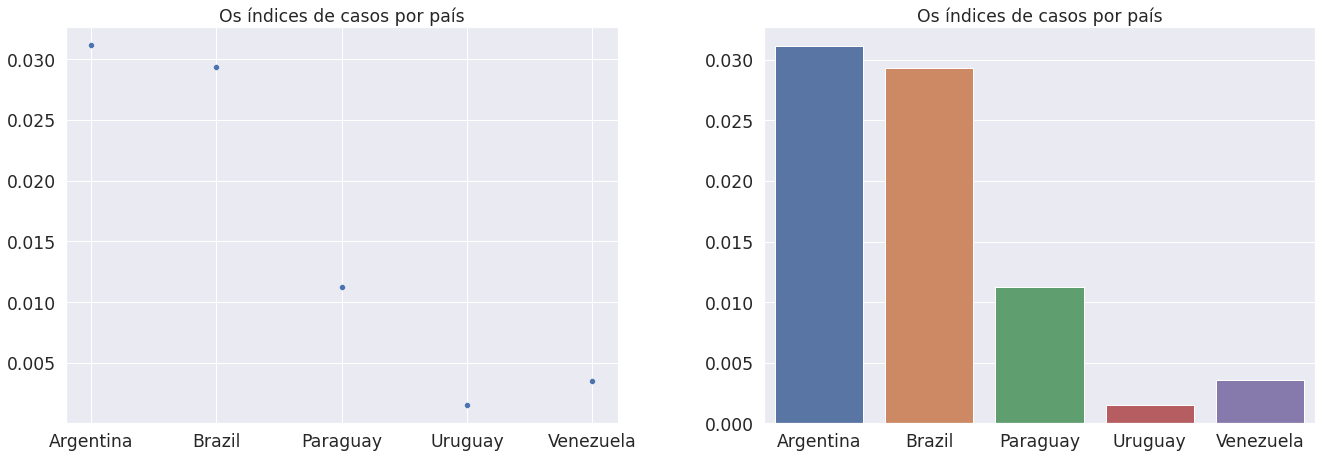

In [ ]:
df_ind = calc_indices(df_ind, 'total_cases', 'population', 'indice_caso')
double_plot_indice(df_ind, 'location', 'indice_caso', 'Os índices de casos por país')

---
# País com o maior índice de mortes

Plotando o gráfico que indica o índice de mortes por país:

→ país com o maior índice de morte = População morte total / população total

---

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


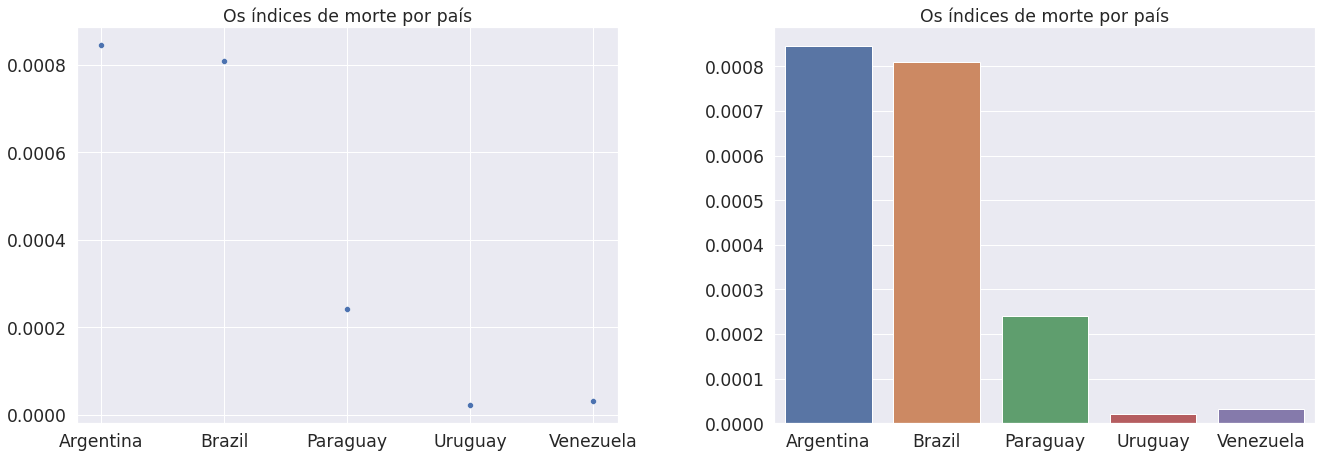

In [ ]:
df_ind = calc_indices(df_ind, 'total_deaths', 'population', 'indice_mortes')
double_plot_indice(df_ind, 'location', 'indice_mortes', 'Os índices de morte por país')

---
# País com maior número de leitos disponíveis

Plotando o gráfico que mostra o país com o maior número de leitos disponíveis

→ Número de leitos (hospital beds per thousand) / População contaminada total

---




/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


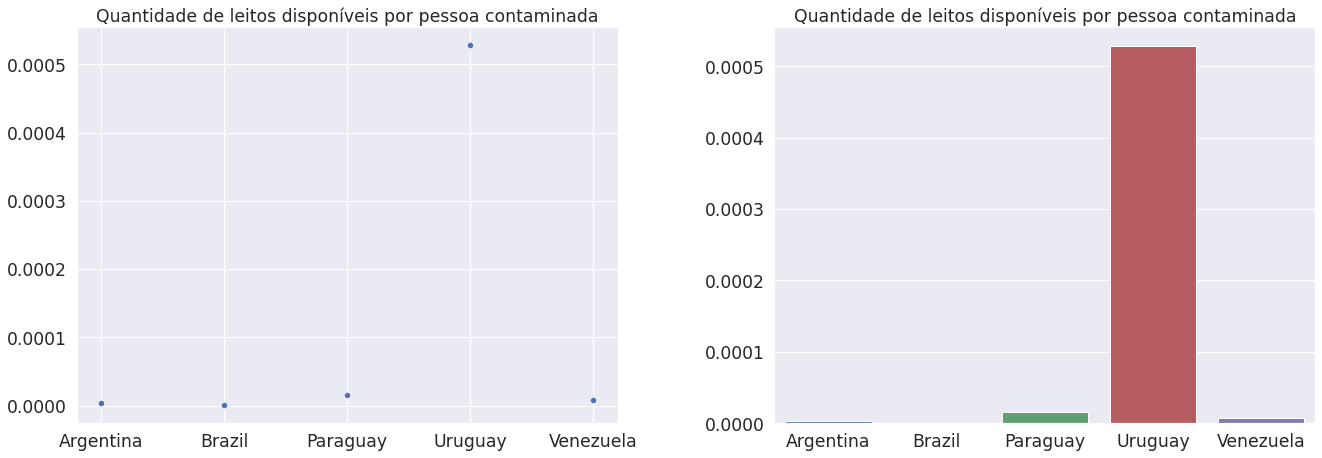

In [ ]:
df_ind = calc_indices(df_ind, 'hospital_beds_per_thousand', 'total_cases', 'num_leitos')
double_plot_indice(df_ind, 'location', 'num_leitos', 'Quantidade de leitos disponíveis por pessoa contaminada')

---
# Países mais ricos e a relação com número de casos

Plotando o gráfico que mostra a relação entre o IDH e o número de casos

→  Países mais ricos e a relação com número de casos = Número de casos / IDH

---



/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


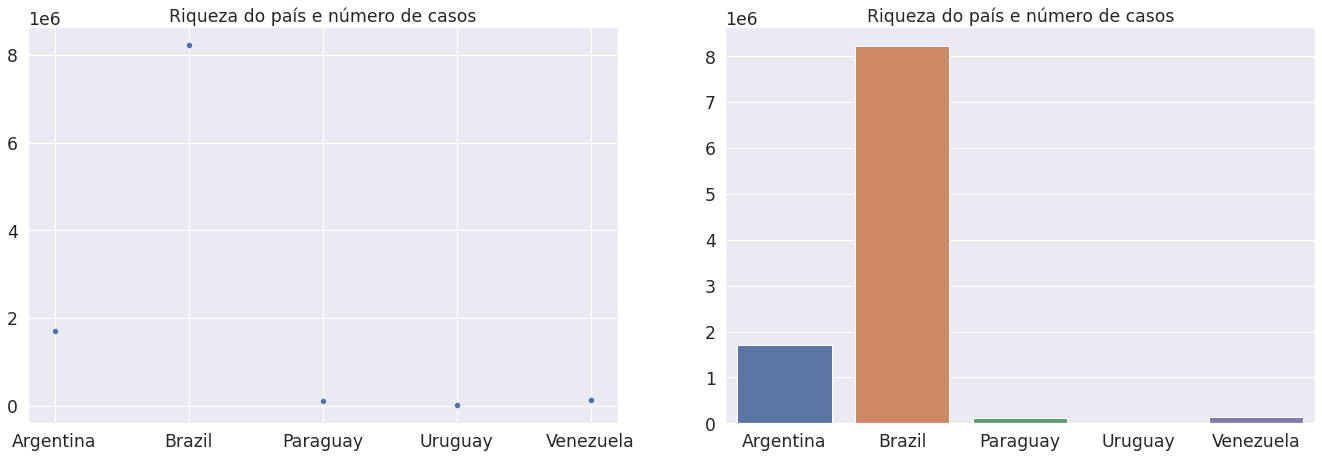

In [ ]:
df_ind = calc_indices(df_ind,'total_cases', 'human_development_index', 'ind_riqueza_casos')
double_plot_indice(df_ind, 'location', 'ind_riqueza_casos', 'Riqueza do país e número de casos')

---
# Número de mortes e população maior que 70

Plotando o gráfico que relaciona o número de mortes e a população com idade >70

→  Número de mortes e população maior que 70 = Número de mortes / população maior que 70

---

In [ ]:
df_ind['aged_70_older'] = df_ind['aged_70_older'] * df_ind['population']

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


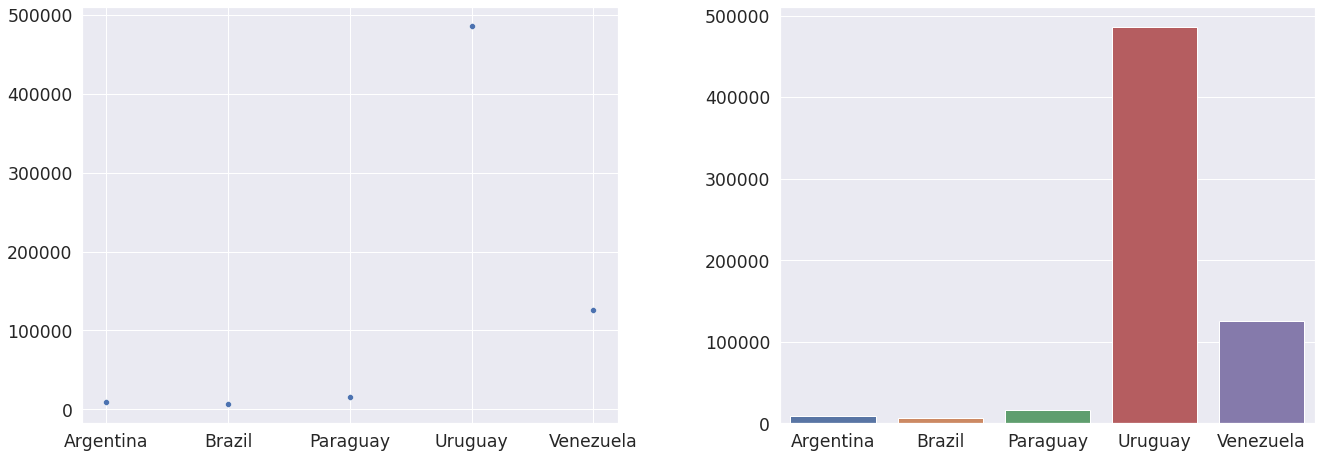

In [ ]:
df_ind = calc_indices(df_ind, 'aged_70_older', 'total_deaths', 'indice_morte_pop')
double_plot_indice(df_ind, 'location', 'indice_morte_pop')

In [ ]:
df_ind

,location,total_cases,new_cases,total_deaths,hosp_patients,total_tests,new_tests,population,aged_70_older,hospital_beds_per_thousand,human_development_index,indice_caso,indice_mortes,num_leitos,ind_riqueza_casos,indice_morte_pop
date,,,,,,,,,,,,,,,,
2020-11-28,Argentina,1407264.0,7846.0,38203.0,0.0,0.0,0.0,45195777.0,3.363018e+08,5.0,0.825,0.031137,0.000845,3.552994e-06,1.705775e+06,8803.020094
2020-11-28,Brazil,6238350.0,34130.0,171974.0,0.0,0.0,0.0,212559409.0,1.075551e+09,2.2,0.759,0.029349,0.000809,3.526574e-07,8.219170e+06,6254.146613
2020-11-28,Paraguay,80436.0,919.0,1720.0,0.0,0.0,0.0,7132530.0,2.733899e+07,1.3,0.702,0.011277,0.000241,1.616192e-05,1.145812e+05,15894.760169
2020-11-28,Uruguay,5303.0,186.0,74.0,0.0,0.0,0.0,3473727.0,3.599129e+07,2.8,0.804,0.001527,0.000021,5.280030e-04,6.595771e+03,486368.722257
2020-11-28,Venezuela,101215.0,398.0,884.0,0.0,0.0,0.0,28435943.0,1.113267e+08,0.8,0.761,0.003559,0.000031,7.903967e-06,1.330026e+05,125935.200051


## Funções

In [ ]:
def get_df_sep_by_location(df):
  locations = df['location'].unique()
  grouped_dataframe = df.groupby('location')

  df_list = {}
  for _, group in grouped_dataframe:
    for i in range(0, len(locations)):
      if group['location'].unique() == locations[i]:
        # globals()['data_' + locations[i]] = group
        df_list[locations[i]] = group
      i += 1
  return df_list


def dict_unique_value(df_dict, col, lista=False):
  gdp_dict = {}
  gdp_list = []
  for country, df in df_dict.items():
    if lista is False:
      gdp_dict[country] = df[col].unique()
    else:
      gdp_list.append([country,df[col].unique()])  
  return gdp_dict, gdp_list


"""
import time
start = time.time()

statement

stop = time.time()
return print('Time: ', stop - start)

"""


"\nimport time\nstart = time.time()\n\nstatement\n\nstop = time.time()\nreturn print('Time: ', stop - start)\n\n"

## Tratamento de dados - separando os países


In [ ]:
columns_use = ['date',
               'location',
               'population',
               'total_cases',
               'new_cases', 
               'total_deaths',
               'new_deaths',
               'total_tests', 
               'new_tests',
               'median_age',
               'aged_70_older',
               'gdp_per_capita', 
               'extreme_poverty', 
               'human_development_index',   
               'hospital_beds_per_thousand',       
               'cardiovasc_death_rate', 
               'diabetes_prevalence', 
               'female_smokers', 
               'male_smokers']

data_teste = data_mercosul[columns_use]
data_teste = data_teste.fillna(0)
data_teste.head()

,date,location,population,total_cases,new_cases,total_deaths,new_deaths,total_tests,new_tests,median_age,aged_70_older,gdp_per_capita,extreme_poverty,human_development_index,hospital_beds_per_thousand,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers
1953,2020-03-04,Argentina,45195777.0,1.0,1.0,0.0,0.0,0.0,0.0,31.9,7.441,18933.907,0.6,0.825,5.0,191.032,5.5,16.2,27.7
1954,2020-03-06,Argentina,45195777.0,2.0,1.0,0.0,0.0,0.0,0.0,31.9,7.441,18933.907,0.6,0.825,5.0,191.032,5.5,16.2,27.7
1955,2020-03-07,Argentina,45195777.0,8.0,6.0,0.0,0.0,0.0,0.0,31.9,7.441,18933.907,0.6,0.825,5.0,191.032,5.5,16.2,27.7
1956,2020-03-08,Argentina,45195777.0,9.0,1.0,1.0,1.0,0.0,0.0,31.9,7.441,18933.907,0.6,0.825,5.0,191.032,5.5,16.2,27.7
1957,2020-03-09,Argentina,45195777.0,12.0,3.0,1.0,0.0,0.0,0.0,31.9,7.441,18933.907,0.6,0.825,5.0,191.032,5.5,16.2,27.7


In [ ]:
df_total = data.copy()
df_total.drop(columns=columns_drop, axis=1, inplace=True)
df_total.date = pd.to_datetime(df_total.date)
df_total.set_index('date', inplace=True)
df_total = df_total[:-2]
df_total = df_total.fillna(0)

In [ ]:
p =["Brazil", "Venezuela", "Argentina", "Paraguay", "Uruguay"] 
data.query('location == @p')

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_per_case,positive_rate,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
1961,ARG,South America,Argentina,2020-03-04,1.0,1.0,NaN,NaN,0.0,NaN,0.022,0.022,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,45195777.0,16.177,31.9,11.198,7.441,18933.907,0.6,191.032,5.50,16.2,27.7,NaN,5.0,76.67,0.825
1962,ARG,South America,Argentina,2020-03-06,2.0,1.0,NaN,NaN,0.0,NaN,0.044,0.022,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,45195777.0,16.177,31.9,11.198,7.441,18933.907,0.6,191.032,5.50,16.2,27.7,NaN,5.0,76.67,0.825
1963,ARG,South America,Argentina,2020-03-07,8.0,6.0,NaN,NaN,0.0,NaN,0.177,0.133,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,45195777.0,16.177,31.9,11.198,7.441,18933.907,0.6,191.032,5.50,16.2,27.7,NaN,5.0,76.67,0.825
1964,ARG,South America,Argentina,2020-03-08,9.0,1.0,NaN,1.0,1.0,NaN,0.199,0.022,NaN,0.022,0.022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,45195777.0,16.177,31.9,11.198,7.441,18933.907,0.6,191.032,5.50,16.2,27.7,NaN,5.0,76.67,0.825
1965,ARG,South America,Argentina,2020-03-09,12.0,3.0,NaN,1.0,0.0,NaN,0.266,0.066,NaN,0.022,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,45195777.0,16.177,31.9,11.198,7.441,18933.907,0.6,191.032,5.50,16.2,27.7,NaN,5.0,76.67,0.825
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57098,VEN,South America,Venezuela,2020-11-25,100498.0,355.0,349.714,876.0,3.0,2.571,3534.189,12.484,12.298,30.806,0.106,0.090,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28435943.0,36.253,29.0,6.614,3.915,16745.022,NaN,204.850,6.47,NaN,NaN,NaN,0.8,72.06,0.761
57099,VEN,South America,Venezuela,2020-11-26,100817.0,319.0,352.429,880.0,4.0,2.857,3545.407,11.218,12.394,30.947,0.141,0.100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28435943.0,36.253,29.0,6.614,3.915,16745.022,NaN,204.850,6.47,NaN,NaN,NaN,0.8,72.06,0.761
57100,VEN,South America,Venezuela,2020-11-27,100817.0,0.0,307.429,880.0,0.0,2.429,3545.407,0.000,10.811,30.947,0.000,0.085,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28435943.0,36.253,29.0,6.614,3.915,16745.022,NaN,204.850,6.47,NaN,NaN,NaN,0.8,72.06,0.761
57101,VEN,South America,Venezuela,2020-11-28,101215.0,398.0,364.286,884.0,4.0,3.000,3559.404,13.996,12.811,31.087,0.141,0.106,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28435943.0,36.253,29.0,6.614,3.915,16745.022,NaN,204.850,6.47,NaN,NaN,NaN,0.8,72.06,0.761


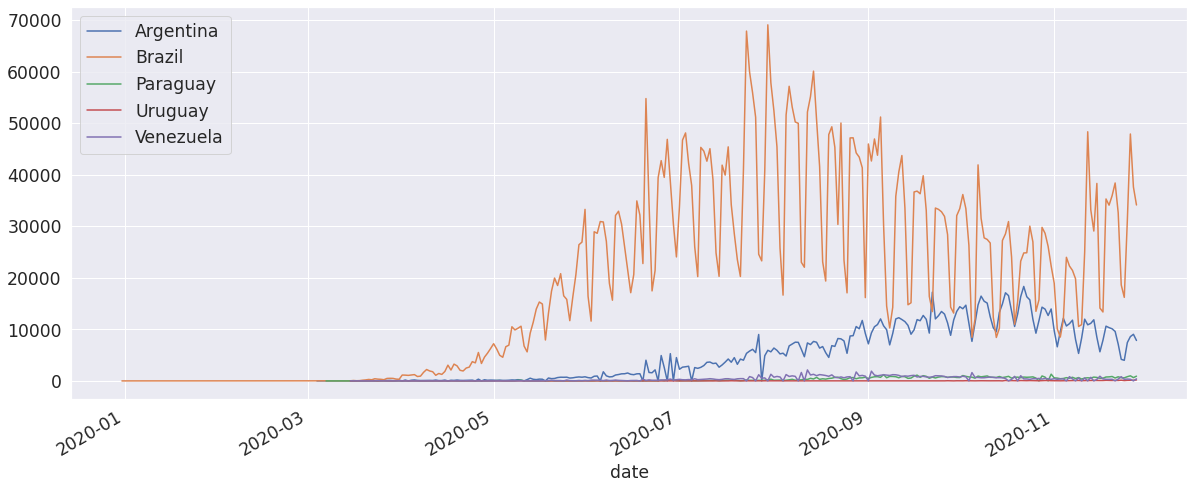

In [ ]:
df_merco = data_total.query('location == @paises_mercosul') 
df_merco['new_cases'].groupby(df_total['location']).plot()
plt.legend()
plt.show()

In [ ]:
dict_df = get_df_sep_by_location(df_total)

In [ ]:
dict_gdp = dict_unique_value(dict_df, 'gdp_per_capita')[0]
dict_idh = dict_unique_value(dict_df,'human_development_index')[0]

In [ ]:
x = list(dict_gdp.values())
y = list(dict_idh.values())

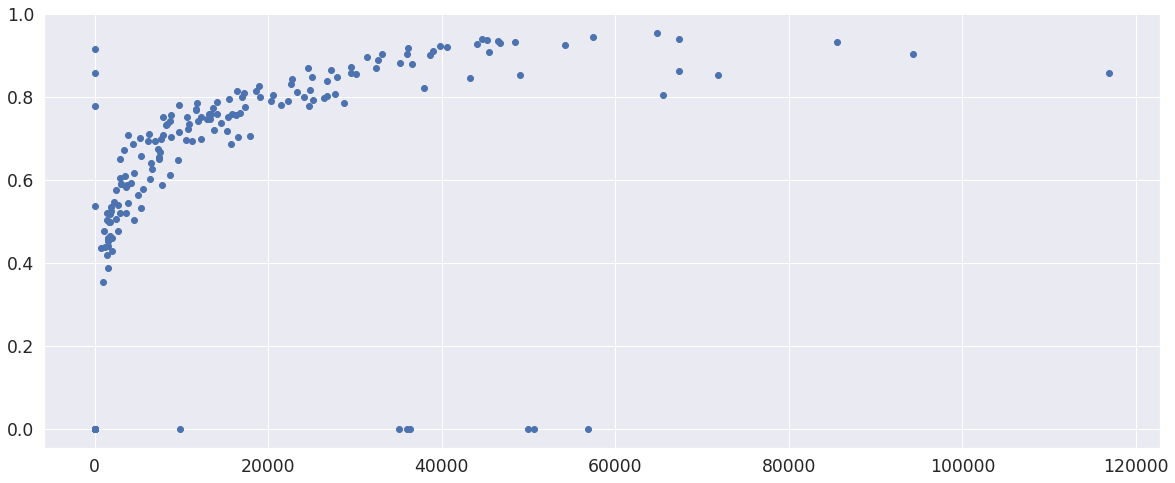

In [ ]:
plt.scatter(x, y)

# Média de novos casos por dia

In [ ]:
data_t = data.drop(index = data.query('location = ["World", "International"]').index)

In [ ]:
data_t.tail()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_per_case,positive_rate,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
59086,ZWE,Africa,Zimbabwe,2020-11-24,9308.0,88.0,58.714,273.0,5.0,2.286,626.256,5.921,3.950,18.368,0.336,0.154,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,161776.0,923.0,10.885,0.062,972.0,0.065,16.555,0.060,tests performed,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535
59087,ZWE,Africa,Zimbabwe,2020-11-25,9398.0,90.0,64.714,274.0,1.0,2.000,632.312,6.055,4.354,18.435,0.067,0.135,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,162849.0,1073.0,10.957,0.072,947.0,0.064,14.634,0.068,tests performed,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535
59088,ZWE,Africa,Zimbabwe,2020-11-26,9508.0,110.0,75.286,274.0,0.0,1.857,639.712,7.401,5.065,18.435,0.000,0.125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,164619.0,1770.0,11.076,0.119,1040.0,0.070,13.814,0.072,tests performed,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535
59089,ZWE,Africa,Zimbabwe,2020-11-27,9623.0,115.0,82.429,274.0,0.0,1.286,647.450,7.737,5.546,18.435,0.000,0.087,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535
59090,ZWE,Africa,Zimbabwe,2020-11-28,9714.0,91.0,84.857,275.0,1.0,1.429,653.572,6.123,5.709,18.502,0.067,0.096,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535


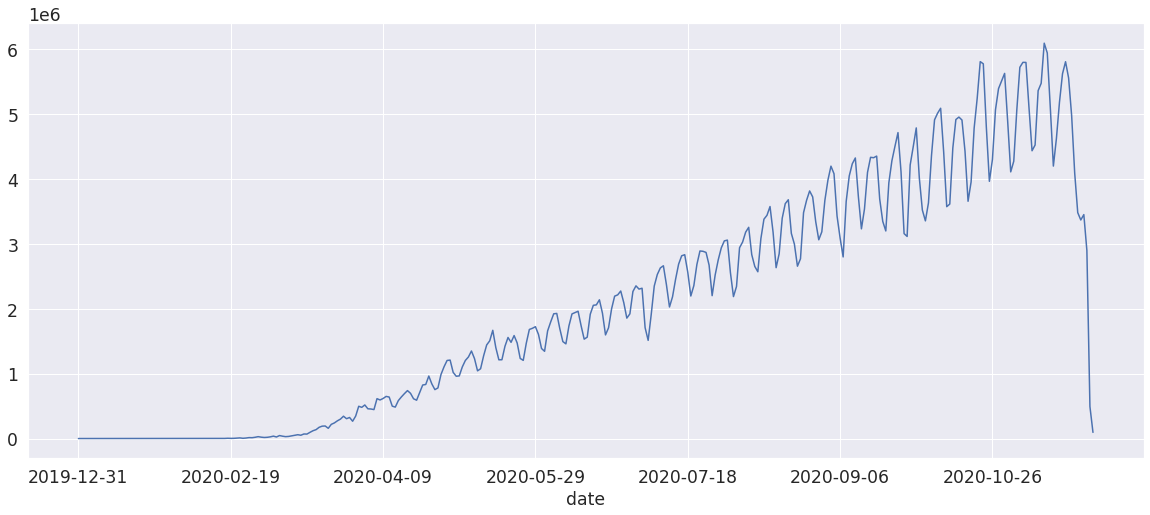

In [ ]:
# data_t.groupby('date')['new_cases'].sum().plot()
# data_t.groupby('date')['new_deaths'].sum().plot()
data_t.groupby('date')['new_tests'].sum().plot()

In [ ]:
data_t['new_cases'].groupby([data_t['date'], data_t['location']]).sum()

date        location         
2019-12-31  Afghanistan           0.0
            Algeria               0.0
            Armenia               0.0
            Australia             0.0
            Austria               0.0
                                 ... 
2020-11-28  Wallis and Futuna     0.0
            Western Sahara        0.0
            Yemen                11.0
            Zambia               16.0
            Zimbabwe             91.0
Name: new_cases, Length: 59091, dtype: float64

In [ ]:
dict_df['Brazil']

,location,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,hosp_patients,total_tests,new_tests,population,aged_70_older,gdp_per_capita,extreme_poverty,hospital_beds_per_thousand,human_development_index
date,,,,,,,,,,,,,,,
2020-11-28,Brazil,6238350.0,34130.0,171974.0,514.0,29348.736,0.0,0.0,0.0,212559409.0,5.06,14103.452,3.4,2.2,0.759
